# Explore Exercises

**Note**: Comparing Numeric vs. a Categorical Example

If the visual is not completely clear, the need for a hypothesis test increases.

Select the appropriate test for your 2 variables:
* If numeric to numeric, run a correlation test
* Compare proportions with χ2 **(2 Categoricals)**
* Compare means with t-test or Mann-Whitney u-test.

Run tests, form conclusions, and document your results
(rinse and then repeat with other variables of interest)

1 tailed Mann-Whitney test. For more on Mann-Whitney, see the `Wikipedia article`

Write down your hypothesis setup

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats

from sklearn.model_selection import train_test_split

#my own files with my own functions
import acquire
import prepare

# If I decide to retrieve other datasets but they'll be raw
from pydataset import data

import os
import env

np.random.seed(123)

# Part I

Do these exercises in `explore.ipynb` notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db**: Using iris data from our MySQL server and the methods used in the lesson above:

# 1. Acquire, prepare & split your data.

In [2]:
df = acquire.get_iris_data() ### acquired it from my acquire.py file

this file exists, reading csv


In [3]:
df.head() ### raw

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df = prepare.prep_iris(df) ### cleaned it with the prep_iris function in my prepare.py file

In [5]:
df.head() ### cleaned

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.shape

(150, 5)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
train, validate, test = prepare.splitting_data(df, 'species', seed=123) 
### using the splitting data function from the prepare.py file to split any df (iris_db in this case)
### in the lesson, univariate stats had already been completed but I'm not sure why, I'll clean it up first and
### split it before doing any charts, loops, and such

In [23]:
print(train.shape)
print(validate.shape)
print(test.shape)

(90, 5)
(30, 5)
(30, 5)


In [14]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


# 2. Univariate Stats

#### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [26]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,90.000000,90.000000,90.000000,90.000000,90
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,30
mean,5.781111,3.023333,3.728889,1.191111,NaN
std,0.792081,0.434741,1.710526,0.757679,NaN
min,4.300000,2.000000,1.100000,0.100000,NaN
25%,5.100000,2.725000,1.600000,0.325000,NaN
50%,5.700000,3.000000,4.200000,1.300000,NaN
75%,6.300000,3.375000,5.100000,1.800000,NaN


In [20]:
train.nunique(dropna = False)

sepal_length    33
sepal_width     20
petal_length    36
petal_width     21
species          3
dtype: int64

In [21]:
train.species.value_counts()

species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64

In [30]:
#initializing empty lists
cat_col = []
con_col = []

#Loop through the string to separate from floats
for col in train.columns:
    
    #find the one string column
    print(col)
    print(train[col].dtype)
    if train[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values (a few even though they are floats)
        print(train[col].nunique())
        if train[col].nunique() < 10:
            print('treas as categorical variable')
            cat_col.append(col)
        else:
            #if more than 10 unique values, append to continuous column variable (which is all of them)
            con_col.append(col)
    print()

sepal_length
float64
this is a number
33

sepal_width
float64
this is a number
20

petal_length
float64
this is a number
36

petal_width
float64
this is a number
21

species
object
this is a string variable



In [31]:
con_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [32]:
cat_col

['species']

#### numberic variable(s)
* value_counts with bins
* histogram

sepal_length
(4.295, 5.2]    27
(5.2, 6.1]      33
(6.1, 7.0]      25
(7.0, 7.9]       5
Name: count, dtype: int64


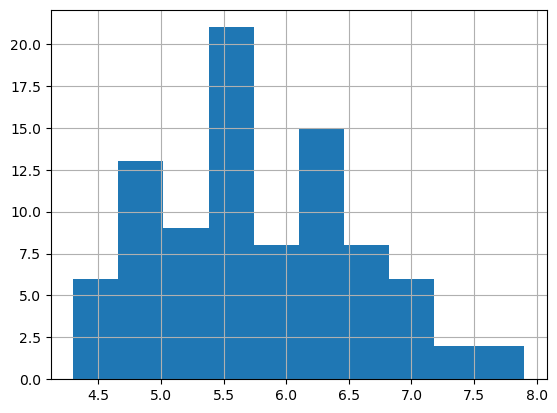

sepal_width
(1.997, 2.6]    17
(2.6, 3.2]      47
(3.2, 3.8]      24
(3.8, 4.4]       2
Name: count, dtype: int64


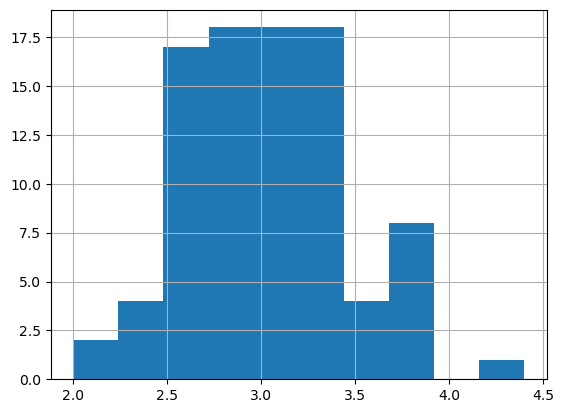

petal_length
(1.0930000000000002, 2.55]    30
(2.55, 4.0]                   12
(4.0, 5.45]                   32
(5.45, 6.9]                   16
Name: count, dtype: int64


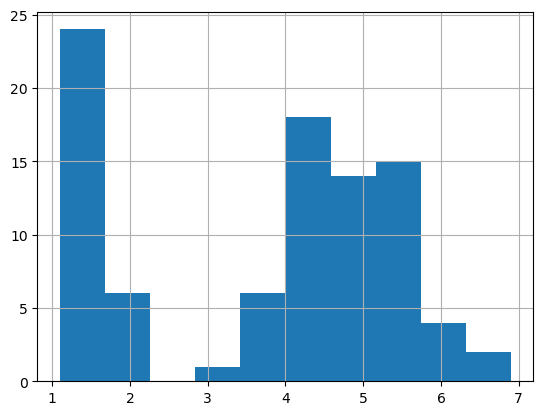

petal_width
(0.0966, 0.7]    30
(0.7, 1.3]       22
(1.3, 1.9]       19
(1.9, 2.5]       19
Name: count, dtype: int64


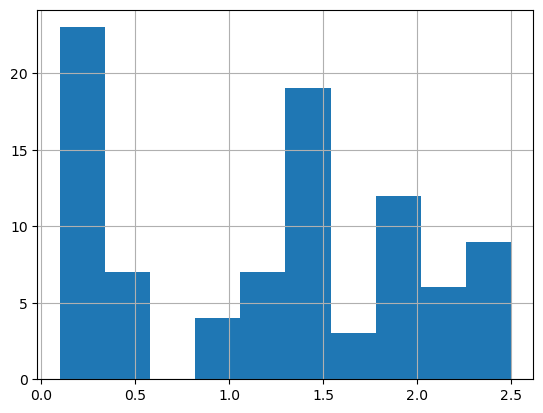

In [42]:
for col in con_col:
#     print(col)
    print(train[col].value_counts(bins=4).sort_index())
    train[col].hist()
    plt.show()

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

#### categorical variable(s)
* value_counts
* bar plots

species
species
setosa        30
virginica     30
versicolor    30
Name: count, dtype: int64
species
setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)



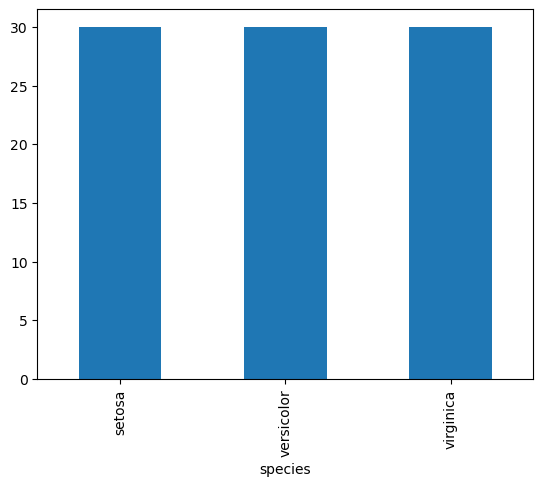

In [44]:
### not necessary to do a 'for' loop since it's only one categorical but good practice
for col in cat_col:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True))
    print(train[col].value_counts().sort_index().plot.bar())
    plt.show
    print()

#### Document takeaways & any actions.

* The sepal length and width seem to be average when looking at all species
* will compare with different species to see the differences between them

* the petal length and width seem to be either high or short when looking at all species
* wil compare with different species to see which have the higher and lower values

* will also look into the relationships between the lengths and widths of both the sepals and petals

# 3. Bivariate Stats

In [45]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


#### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

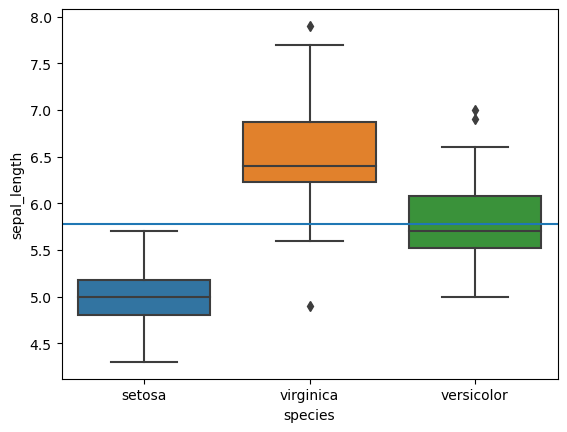

In [51]:
sns.boxplot(y='sepal_length', x='species', data=train)
average_sepal_length = train.sepal_length.mean()
plt.axhline(average_sepal_length)
plt.show()

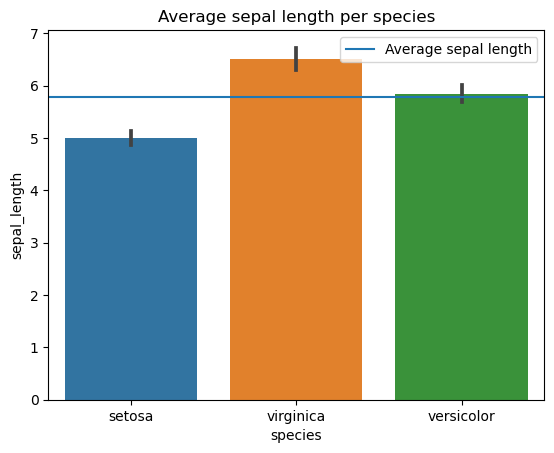

In [52]:
plt.title('Average sepal length per species')
sns.barplot(x="species", y="sepal_length", data=train)
average_sepal_length = train.sepal_length.mean()
plt.axhline(average_sepal_length, label="Average sepal length")
plt.legend()
plt.show()

### all close to the average

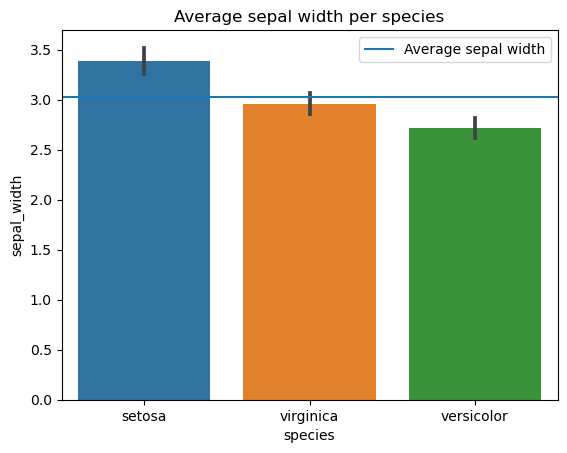

In [53]:
plt.title('Average sepal width per species')
sns.barplot(x="species", y="sepal_width", data=train)
average_sepal_width = train.sepal_width.mean()
plt.axhline(average_sepal_width, label="Average sepal width")
plt.legend()
plt.show()

### all close to the average

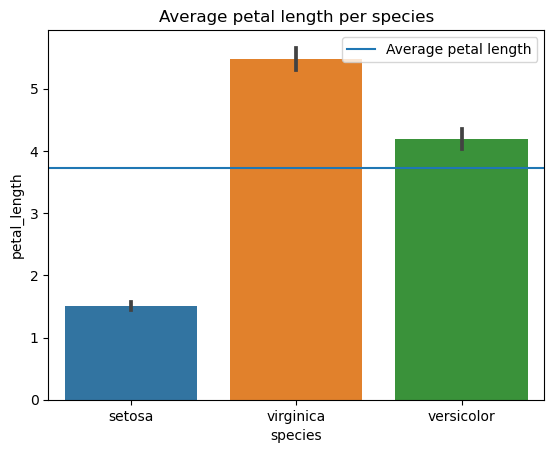

In [54]:
plt.title('Average petal length per species')
sns.barplot(x="species", y="petal_length", data=train)
average_petal_length = train.petal_length.mean()
plt.axhline(average_petal_length, label="Average petal length")
plt.legend()
plt.show()

### setosa has short petals while virginica is fairly long

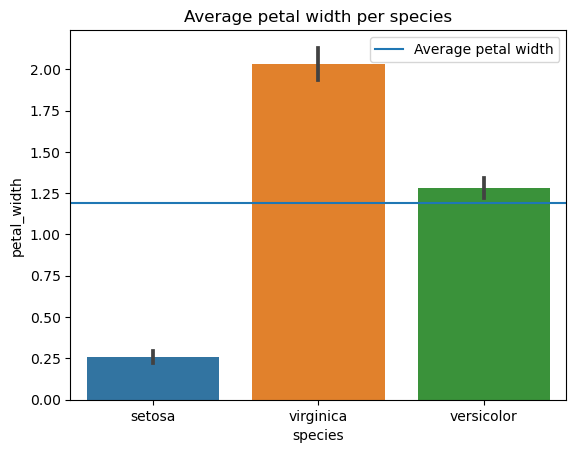

In [55]:
plt.title('Average petal width per species')
sns.barplot(x="species", y="petal_width", data=train)
average_petal_width = train.petal_width.mean()
plt.axhline(average_petal_width, label="Average petal width")
plt.legend()
plt.show()

### Setosa petal widths are small while virginica is almost twice the average

#### For each measurement type, compute the descriptive statistics for each species.

In [108]:
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  30.000000   30.000000  30.000000
             mean    4.993333    5.843333   6.506667
             std     0.354219    0.478996   0.616404
             min     4.300000    5.000000   4.900000
             25%     4.800000    5.525000   6.225000
             50%     5.000000    5.700000   6.400000
             75%     5.175000    6.075000   6.875000
             max     5.700000    7.000000   7.900000
sepal_width  count  30.000000   30.000000  30.000000
             mean    3.390000    2.720000   2.960000
             std     0.384484    0.303315   0.319050
             min     2.300000    2.000000   2.500000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.750000   2.950000
             75%     3.650000    2.900000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  30.000000   30.000000  30.000000
             mean    1.510000    4.196667   5.480000
             std     0.178789    0.444494   0.508141
             min     1.100000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.200000   5.500000
             75%     1.600000    4.500000   5.675000
             max     1.900000    5.100000   6.900000
petal_width  count  30.000000   30.000000  30.000000
             mean    0.256667    1.283333   2.033333
             std     0.100630    0.170361   0.277095
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.050000
             75%     0.300000    1.375000   2.300000
             max     0.500000    1.600000   2.500000
sepal_area   count  30.000000   30.000000  30.000000
             mean   17.030333   15.962667  19.354667
             std     2.972537    2.685370   3.435700
             min    10.350000   10.000000  12.250000
             25%    14.920000   14.105000  17.300000
             50%    16.915000   15.960000  19.670000
             75%    18.742500   17.095000  21.267500
             max    25.080000   22.400000  30.020000

#### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [76]:
null_hypothesis = 'There is NO difference between the two'
alternative_hypothesis = 'There IS a noticeable difference between the two'

In [69]:
#subset the data into virginica species & versicolor species
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

alpha = 0.05

In [70]:
### check variances of the two groups
virginica.petal_width.var(), versicolor.petal_width.var()

### decently different

(0.07678160919540228, 0.029022988505747124)

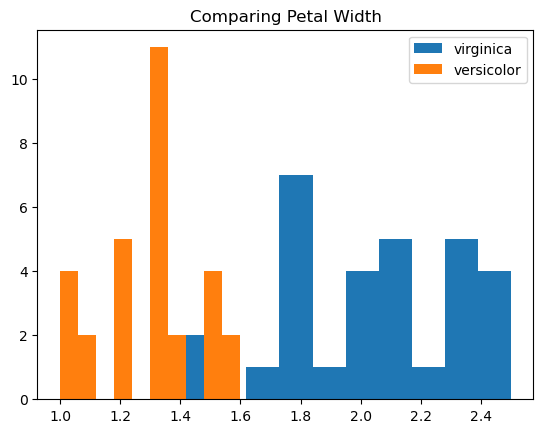

In [71]:
plt.title("Comparing Petal Width")
plt.hist(virginica.petal_width, label='virginica')
plt.hist(versicolor.petal_width, label='versicolor')
plt.legend()
plt.show()

In [72]:
### performing a 2-tailed test to look for a noticeable difference between the two

### Petal Width
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width)

In [78]:
p

7.12423012584302e-11

In [77]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that There is NO difference between the two
We find evidence evidence to move forward with the understaind that There IS a noticeable difference between the two


In [79]:
### Sepal Width
t, p = stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width)
p
### reject the null as well (2/4 so far)

0.00844990346320156

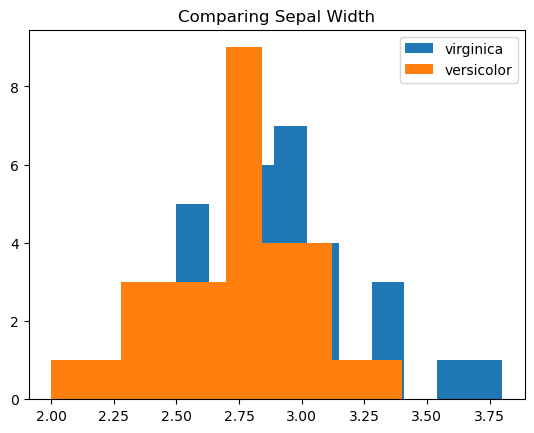

In [82]:
plt.title("Comparing Sepal Width")
plt.hist(virginica.sepal_width, label='virginica')
plt.hist(versicolor.sepal_width, label='versicolor')
plt.legend()
plt.show()
### this was the only one that was close(NOT a tiny p-value compared to alpha)
### and visibly would be hard to reject the null without doing a test.

In [80]:
### Petal Length
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length)
p
### reject the null as well (3/4 so far)

1.368106833576727e-10

In [81]:
### Sepal Length
t, p = stats.mannwhitneyu(virginica.sepal_length, versicolor.sepal_length)
p
### reject the null ALSO (4/4 reject)

2.0617069812153646e-05

#### Document takeaways & any actions.

* When comparing means of all measurement types between the Virginica and Versicolor species, there was a noticeable difference in all 4 scenarious.
* Only once was a mann whitney u-test truly needed be sure because the visual histogram was not enough to reject the null.

* Could repeat with the Setosa species but I would compare the Sepals because the Petals are visibly much lower and wouldn't require a stats test to see the difference in means.

# 4. Multivariate Stats

#### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


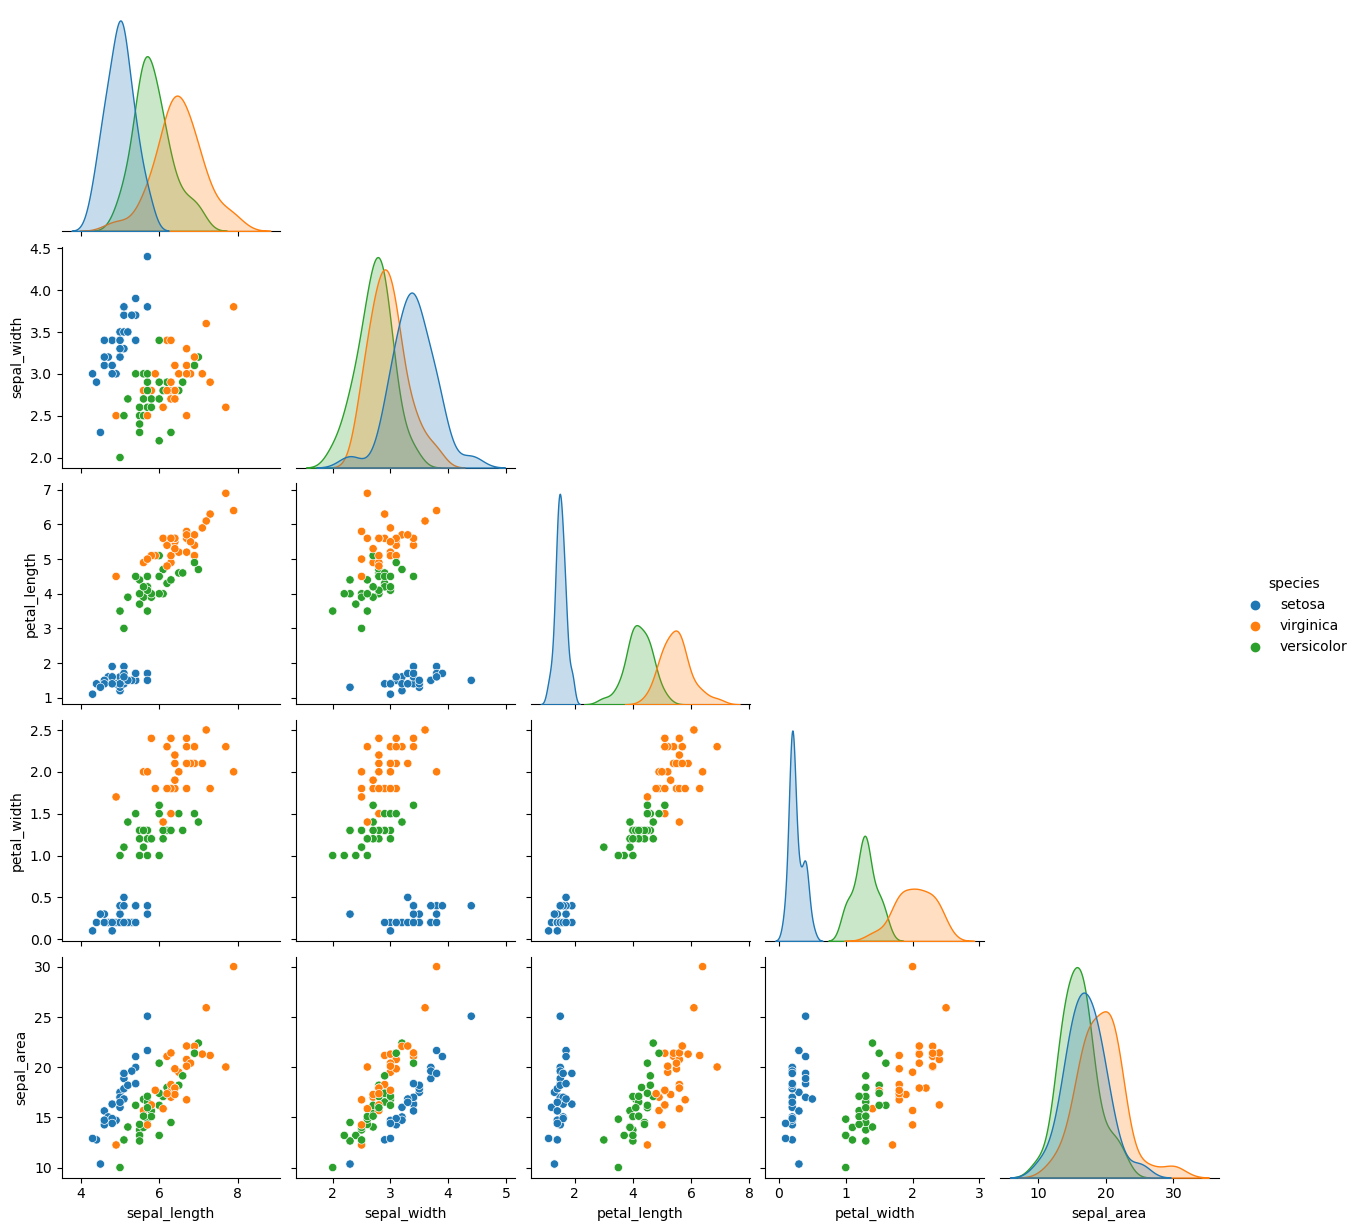

In [102]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

### Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


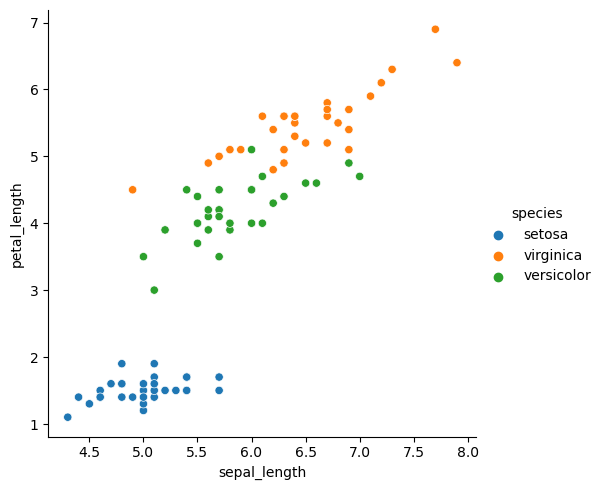

In [84]:
# Visualize two numeric variables of the species
# Example: Sepal Length vs. Petal Length with species color

sns.relplot(x='sepal_length', y='petal_length', hue='species', data=train)
plt.show()

### visual makes sense, petal length is correlated with sepal length

#### IGNORE
Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [91]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


## Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [96]:
### let's create sepal area
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
24,4.8,3.4,1.9,0.2,setosa,16.32
147,6.5,3.0,5.2,2.0,virginica,19.50
88,5.6,3.0,4.1,1.3,versicolor,16.80
123,6.3,2.7,4.9,1.8,virginica,17.01
31,5.4,3.4,1.5,0.4,setosa,18.36


#### check assumptions for the t-test:
* **Independence**: This is generally a safe assumption here. each flower measurement should be independent of the others.
* **Normality**: Test using a Shapiro-Wilk test or visually inspect with histograms or Q-Q plots.
* **Equal Variance**: Test using Leven's test or visually inspect with box plots

In [104]:
### Stats test

# Filter data
virginica_sepal_area = train[train['species'] == 'virginica']['sepal_area']
setosa_sepal_area = train[train['species'] == 'setosa']['sepal_area']

# Normality Test
print("Normality Test (Shapiro-Wilk):")
print("Virginica:", stats.shapiro(virginica_sepal_area))
print("Setosa:", stats.shapiro(setosa_sepal_area))
### A higher T-value generally indicates a better fit to a normal distribution.
### A higher P-value indicates not enough evidence to reject the null, meaning, the data does NOT
        ### signify a deviation from normality.

    
# Equal Variance Test
print("Equal Variance Test (Levene's Test):", stats.levene(virginica_sepal_area, setosa_sepal_area))
### A higher T-value indicates stronger evidence Against equal variances
### A higher P-value indicates variances between the groups are not significantly different.


# T-test(when > 0.05) or Mann-Whitney U Test(when < 0.05)
# Use T-test if normality and equal variance assumptions are met
# Otherwise, use Mann-Whitney U Test


Normality Test (Shapiro-Wilk):
Virginica: ShapiroResult(statistic=0.936054527759552, pvalue=0.07124802470207214)
Setosa: ShapiroResult(statistic=0.9842221140861511, pvalue=0.9232165813446045)
Equal Variance Test (Levene's Test): LeveneResult(statistic=0.36498481213841283, pvalue=0.5481066799623959)


In [107]:
# t-test

t, p = stats.ttest_ind(virginica_sepal_area, setosa_sepal_area)
print(t)
print(p)
print('Null is rejected, indicating a significant difference in means between the two groups')

2.802232096231203
0.006887872097767309
Null is rejected, indicating a significant difference in means between the two groups


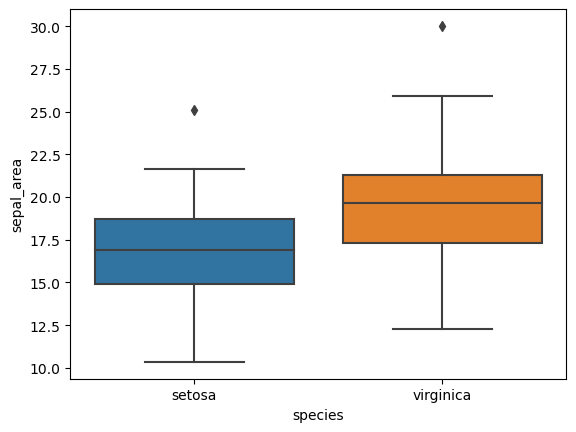

In [105]:
sns.boxplot(x='species', y='sepal_area', data=train[train['species'].isin(['virginica', 'setosa'])])
plt.show()

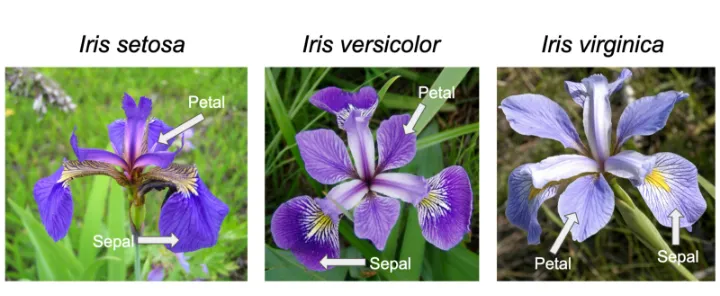

#### Document takeaways and any actions.

* 

# Part II

### Explore your `titanic` dataset more completely.

#### Determine drivers of the target variable

#### Determine if certain columns should be dropped

#### Determine if it would be valuable to bin some numeric columns

#### Determine if it would be valuable to combine multiple columns into one.

### Does it make sense to combine any features?

### Do you find any surprises?

### Document any and all findings and takeaways in your notebook using markdown.

## Part III

#### Explore your `telco` data to discover drivers of churn

#### Determine if certain columns should be dropped

#### Determine if it would be valuable to bin some numeric columns

#### Determine if it would be valuable to combine multiple columns into one.

### What are your drivers of churn?

### Does it make sense to combine any features?

### Do you find any surprises?

### Document any and all findings and takeaways in your notebook using markdown.